### Financial News and Stock Price Dataset Analysis

Analyze the dataset to understand publication trends, publisher activity, and headline characteristics.

This notebook performs exploratory analysis on financial news articles, including:

- Descriptive statistics for headline lengths
- Publisher contributions and domain analysis
- Time series analysis to detect publication spikes
- Hour-of-day, weekday, and monthly trends
- Visualizations for all major insights



In [1]:
import os
import sys

sys.path.insert(0, os.path.dirname(os.getcwd()))
from scripts.data_loader import DataLoader
from scripts.data_analyzer import DataAnalyzer
from scripts.data_visualizer import DataVisualizer

# Suppress FutureWarnings
import warnings
warnings.filterwarnings('ignore')

print("All required modules loaded successfully!")

All required modules loaded successfully!


In [2]:
DATA_FILEPATH = '../data/raw_analyst_ratings.csv' # <-- update this path as needed
OUTPUT_CSV = '../data/processed_financial_news.csv'

### 1. Load data (uses DataLoader.load_data)

In [3]:
loader = DataLoader()
df = loader.load_data(DATA_FILEPATH)
print('\nLoaded dataframe shape:', df.shape)


# Show top 5 rows
print(df.head())


Loaded dataframe shape: (1407328, 6)
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00

### 2 — Initial Exploration (DataAnalyzer.explore_data)
This step prints dataset overview, missing values, duplicates, numerical and categorical summaries.

In [4]:
analyzer = DataAnalyzer(df)
analyzer.explore_data()

Initializing DataAnalyzer with dataframe...
Initial dataframe loaded with 1407328 rows and 6 columns.


================= STEP 1: EXPLORING RAW DATA =================

[1] Dataset Overview:
--------------------------------------------------
Total Records: 1407328
Columns: Unnamed: 0, headline, url, publisher, date, stock

[2] Checking Missing Values:
--------------------------------------------------
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []

[3] Checking Duplicate Rows:
--------------------------------------------------
Duplicates Found: 0 rows
(Excluding 'Unnamed: 0') Duplicates: 1

[4] Summary Statistics (Numeric Columns):
--------------------------------------------------
         Unnamed: 0
count  1.407328e+06
mean   7.072454e+05
std    4.081009e+05
min    0.000000e+00
25%    3.538128e+05
50%    7.072395e+05
75%    1.060710e+06
max    1.413848e+06

[5] Categorical Column Analysis:
--------------------------------------------------

Column: headline
Unique value

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX


### 3 - Data Cleaning and Preprocessing
Let's clean and standardize our dataset for analysis

In [5]:
analyzer.clean_data()


================= STEP 2: CLEANING DATA =================

[1] Dropping rows missing headline, stock, or publisher...
Removed 0 rows.

[2] Removing duplicate headline/stock/date combinations...
Removed 11355 duplicates.

[3] Dropping unnecessary column 'Unnamed: 0'...

[4] Fixing and parsing date column...
Removed 0 rows with invalid dates.

[5] Cleaning text columns (headline, publisher, stock)...

[6] Cleaning URL column...

[7] Removing remaining empty strings...
Removed 0 rows.

[8] Sorting by date...

[9] Creating new derived columns (year, month, day_of_week, headline_length, hour)...

=== Completed Data Cleaning ===



,headline,url,publisher,date,stock,year,month,day_of_week,headline_length,hour
0,How Treasuries and ETFs Work,https://www.benzinga.com/28044/how-treasuries-...,Paco Ahlgren,2009-02-14 00:00:00-04:00,NAV,2009,2,Saturday,28,0
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,FT,2009,4,Monday,45,0
2,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,Y,2009,4,Monday,45,0
3,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-29 00:00:00-04:00,A,2009,4,Wednesday,22,0
4,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore Cfa,2009-05-22 00:00:00-04:00,AM,2009,5,Friday,49,0
...,...,...,...,...,...,...,...,...,...,...
1395968,7 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 16:49:41-04:00,PVH,2020,6,Thursday,49,16
1395969,"Financials, Energy Among Worst-Hit Sectors In ...",https://www.benzinga.com/news/20/06/16238109/f...,Jj Kinahan,2020-06-11 16:51:33-04:00,WMT,2020,6,Thursday,84,16
1395970,"Twitter Removes About 174,000 China-Linked Acc...",https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 17:01:39-04:00,TWTR,2020,6,Thursday,130,17
1395971,PG&E Corp Reports CPUC Approved Co.'s Microgri...,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 17:11:20-04:00,PCG,2020,6,Thursday,57,17


In [6]:
analyzer.exploratory_analysis()


================= STEP 3: DEEPER EXPLORATORY ANALYSIS =================
[1] Dataset Shape:
(1395973, 10)

[2] Date Range:
2009-02-14 00:00:00-04:00  -->  2020-06-11 17:12:35-04:00

[3] Top 10 Most Covered Stocks:
stock
MRK     3300
MS      3149
MU      3138
NVDA    3137
NFLX    3028
EBAY    3012
M       2998
VZ      2962
GILD    2951
QCOM    2933
Name: count, dtype: int64

[4] Articles by Hour of Day:
hour
0     1340058
1          14
2          57
3          93
4        1469
5        1829
6        2475
7        5032
8        5526
9        5965
10       7668
11       5701
12       5732
13       2710
14       2075
15       1612
16       3939
17       2799
18        704
19        227
20        131
21         82
22         48
23         27
Name: count, dtype: int64

[5] Headline Length Statistics:
count    1.395973e+06
mean     7.326273e+01
std      4.081928e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_len

,headline,url,publisher,date,stock,year,month,day_of_week,headline_length,hour
0,How Treasuries and ETFs Work,https://www.benzinga.com/28044/how-treasuries-...,Paco Ahlgren,2009-02-14 00:00:00-04:00,NAV,2009,2,Saturday,28,0
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,FT,2009,4,Monday,45,0
2,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,Y,2009,4,Monday,45,0
3,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-29 00:00:00-04:00,A,2009,4,Wednesday,22,0
4,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore Cfa,2009-05-22 00:00:00-04:00,AM,2009,5,Friday,49,0
...,...,...,...,...,...,...,...,...,...,...
1395968,7 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 16:49:41-04:00,PVH,2020,6,Thursday,49,16
1395969,"Financials, Energy Among Worst-Hit Sectors In ...",https://www.benzinga.com/news/20/06/16238109/f...,Jj Kinahan,2020-06-11 16:51:33-04:00,WMT,2020,6,Thursday,84,16
1395970,"Twitter Removes About 174,000 China-Linked Acc...",https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 17:01:39-04:00,TWTR,2020,6,Thursday,130,17
1395971,PG&E Corp Reports CPUC Approved Co.'s Microgri...,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 17:11:20-04:00,PCG,2020,6,Thursday,57,17


In [7]:
cleaned_df = analyzer.df
visualizer = DataVisualizer(cleaned_df)

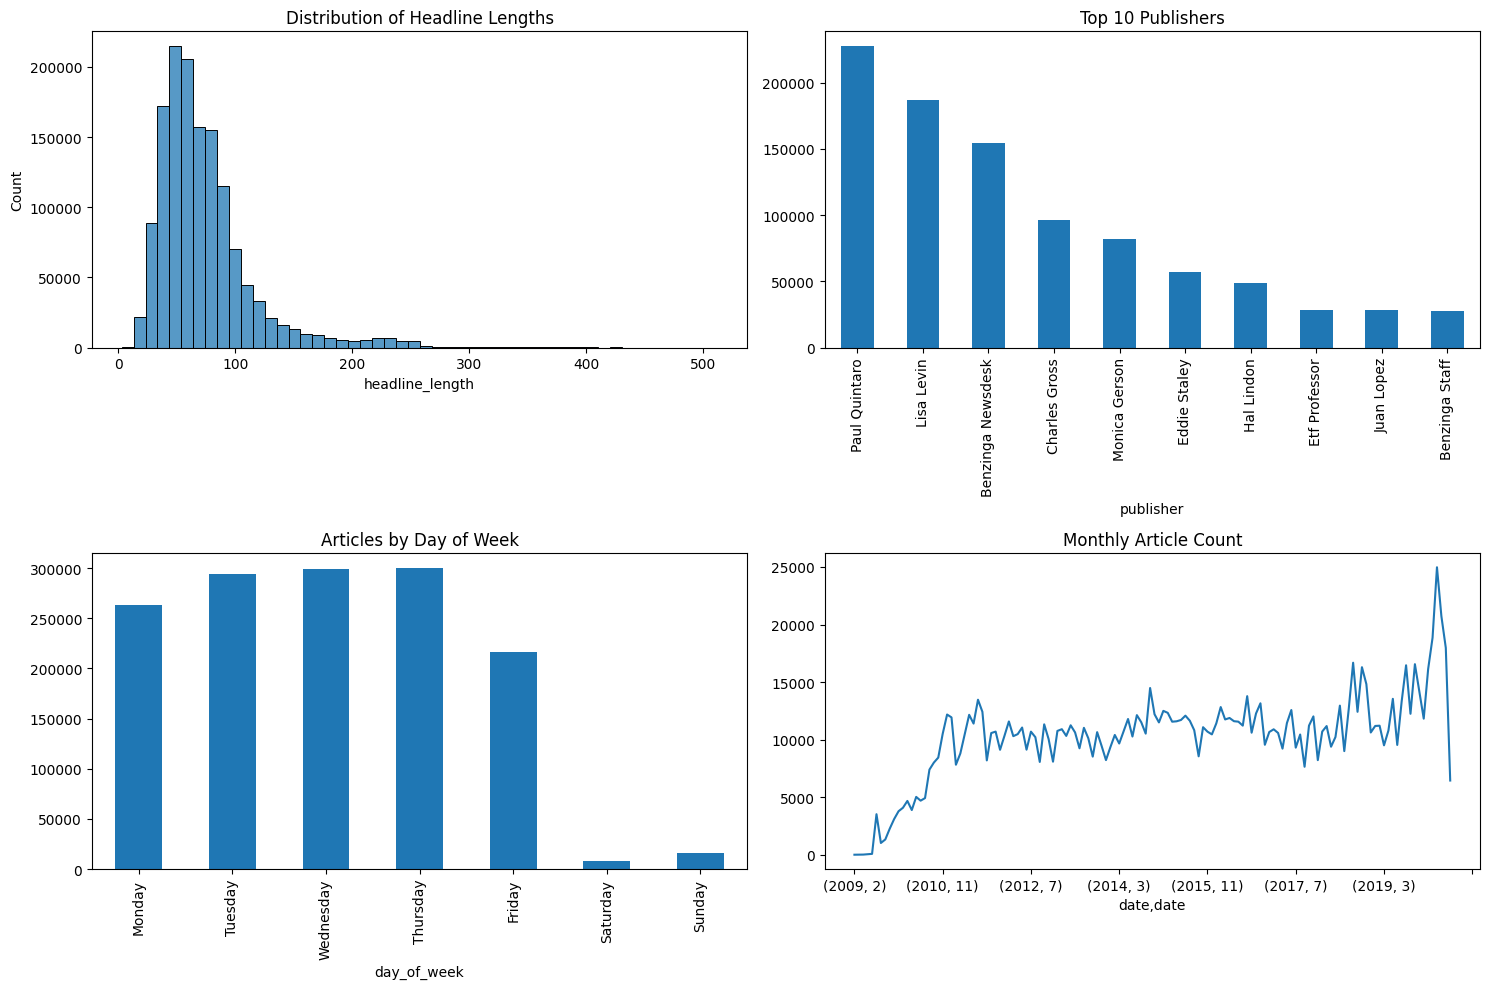

In [8]:
visualizer.descriptive_statistics()

In [9]:
analyzer.analyze_sentiment()


================= STEP 4: SENTIMENT ANALYSIS =================
[1] Calculating sentiment scores using VADER...
[2] Categorizing sentiment into Negative / Neutral / Positive...

[3] Sentiment Distribution:
Neutral: 732203 articles (52.5%)
Positive: 440145 articles (31.5%)
Negative: 223625 articles (16.0%)

=== Completed Sentiment Analysis ===



,headline,url,publisher,date,stock,year,month,day_of_week,headline_length,hour,sentiment,sentiment_category
0,How Treasuries and ETFs Work,https://www.benzinga.com/28044/how-treasuries-...,Paco Ahlgren,2009-02-14 00:00:00-04:00,NAV,2009,2,Saturday,28,0,0.2263,Positive
1,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,FT,2009,4,Monday,45,0,0.0000,Neutral
2,Update on the Luxury Sector: 2nd Quarter 2009,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-27 00:00:00-04:00,Y,2009,4,Monday,45,0,0.0000,Neutral
3,Going Against the Herd,https://www.benzinga.com/charles-lewis-sizemor...,Charles Lewis Sizemore Cfa,2009-04-29 00:00:00-04:00,A,2009,4,Wednesday,22,0,0.0000,Neutral
4,Charles Sizemore Radio Interview Saturday Morning,https://www.benzinga.com/11218/charles-sizemor...,Charles Lewis Sizemore Cfa,2009-05-22 00:00:00-04:00,AM,2009,5,Friday,49,0,0.0000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
1395968,7 Stocks Moving In Thursday's After-Hours Session,https://www.benzinga.com/news/20/06/16237924/7...,Tyree Gorges,2020-06-11 16:49:41-04:00,PVH,2020,6,Thursday,49,16,0.0000,Neutral
1395969,"Financials, Energy Among Worst-Hit Sectors In ...",https://www.benzinga.com/news/20/06/16238109/f...,Jj Kinahan,2020-06-11 16:51:33-04:00,WMT,2020,6,Thursday,84,16,0.2732,Positive
1395970,"Twitter Removes About 174,000 China-Linked Acc...",https://www.benzinga.com/tech/20/06/16238284/t...,Benzinga Newsdesk,2020-06-11 17:01:39-04:00,TWTR,2020,6,Thursday,130,17,-0.2500,Negative
1395971,PG&E Corp Reports CPUC Approved Co.'s Microgri...,https://www.benzinga.com/news/20/06/16238398/p...,Benzinga Newsdesk,2020-06-11 17:11:20-04:00,PCG,2020,6,Thursday,57,17,0.4215,Positive


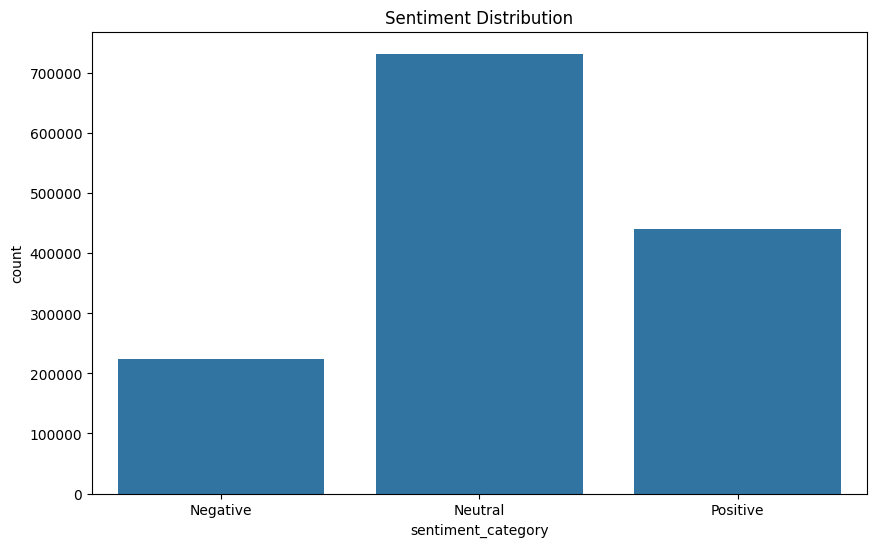

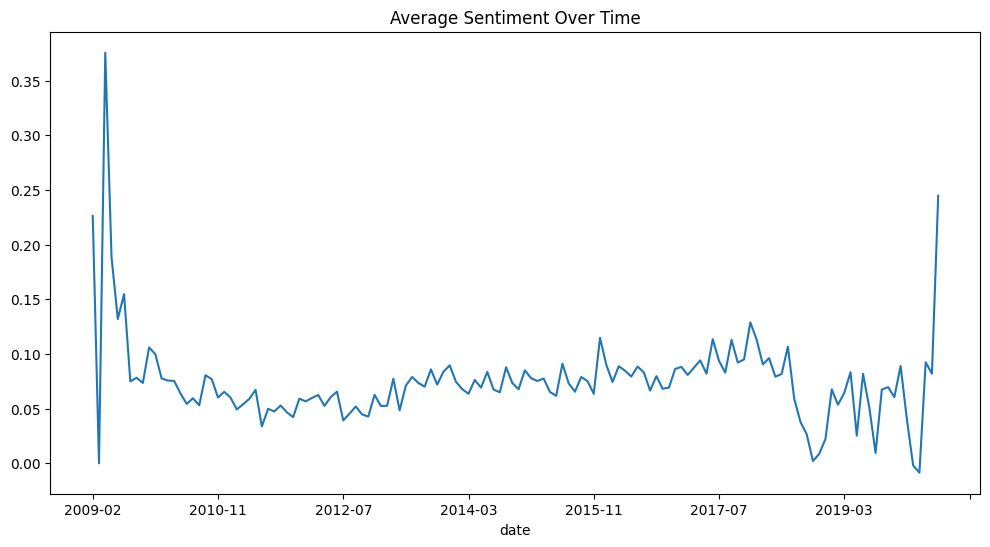

In [10]:
visualizer.df = analyzer.df  # update reference explicitly
visualizer.plot_sentiment()

In [11]:
lda, dictionary, corpus = analyzer.extract_topics()



================= STEP 5: TOPIC MODELING (Optimized for Single-Core) =================
[1] Preprocessing headlines for Gensim LDA...
[2] Dictionary size: 49063
[3] Corpus size: 1395973 documents
[4] Fitting LDA model with 5 topics (single-core)...
[5] Sample topics:
Topic 0: 0.165*"the" + 0.092*"in" + 0.049*"session" + 0.046*"moving" + 0.037*"stocks" + 0.037*"market" + 0.029*"trading" + 0.021*"mid-day" + 0.012*"oil" + 0.012*"daily"
Topic 1: 0.047*"sales" + 0.046*"eps" + 0.024*"q1" + 0.024*"estimate" + 0.022*"from" + 0.020*"estimate," + 0.020*"vs" + 0.019*"reports" + 0.016*"q4" + 0.014*"adj."
Topic 2: 0.090*"to" + 0.068*"on" + 0.065*"target" + 0.065*"price" + 0.041*"maintains" + 0.028*"raises" + 0.024*"lowers" + 0.019*"buy" + 0.015*"announces" + 0.012*"morgan"
Topic 3: 0.040*"of" + 0.030*"shares" + 0.027*"are" + 0.024*"to" + 0.021*"and" + 0.019*"on" + 0.018*"several" + 0.018*"trading" + 0.018*"companies" + 0.017*"as"
Topic 4: 0.095*"stocks" + 0.061*"52-week" + 0.051*"for" + 0.050*"hit"

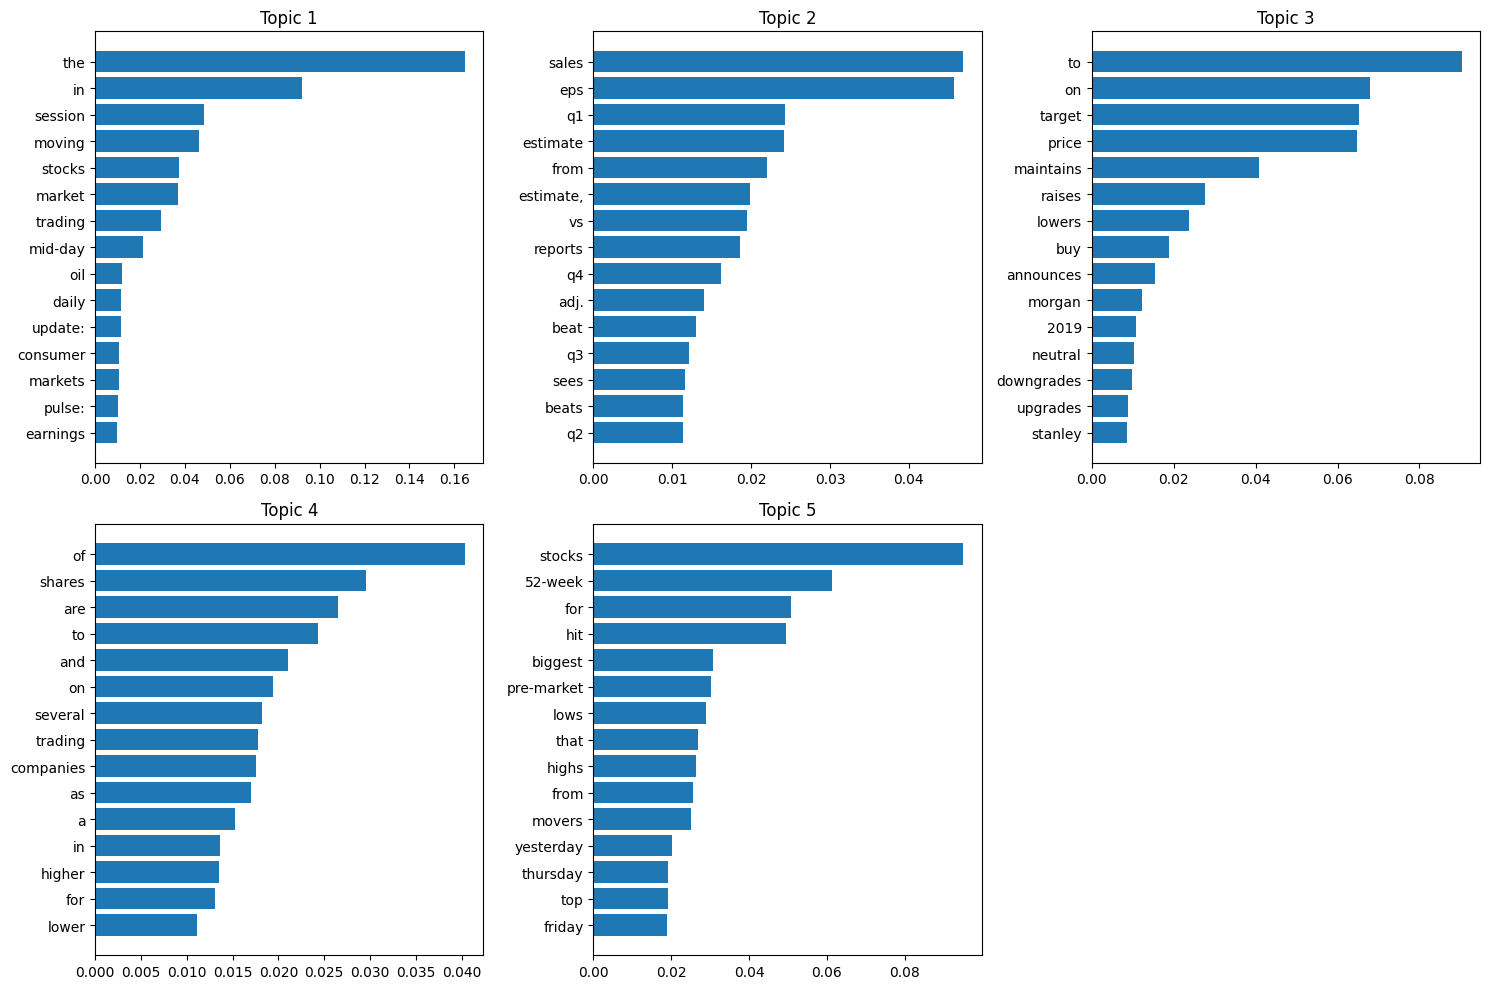

In [12]:
visualizer.df = analyzer.df
visualizer.visualize_topics(lda, dictionary, n_top_words=15)
